## Comparing the LLMs

In [ ]:
import pandas as pd

all_results = {
    "Baseline": results_baseline,
    "FlanT5 (zero-shot)": results_flan_zero,
    "FlanT5 (few-shot)": results_flan_few,
    "Gpt-3.5-turbo (zero-shot)": results_openai_zero,
    "Gpt-3.5-turbo (few-shot)": results_openai_few,
    "Gemini 1.5 Pro (zero-shot)": results_gemini_zero,
    "Gemini 1.5 Pro (few-shot)": results_gemini_few
}

# df for comparison
df_results = pd.DataFrame(all_results).T
df_results.sort_values(by='BERTScore-F1', ascending=False, inplace=True)
df_results

,BLEU,ROUGE-1,ROUGE-2,BERTScore-F1,Flesch
Gpt-3.5-turbo (few-shot),0.063395,0.274479,0.084488,0.840747,50.177692
Gemini 1.5 Pro (few-shot),0.040152,0.263981,0.074662,0.836702,54.596490
Gpt-3.5-turbo (zero-shot),0.046358,0.263486,0.070361,0.835563,47.723126
Baseline,0.100607,0.288851,0.127052,0.833566,33.603426
FlanT5 (few-shot),0.079522,0.260793,0.113366,0.832315,35.015687
FlanT5 (zero-shot),0.071483,0.244670,0.084517,0.824712,33.539429
Gemini 1.5 Pro (zero-shot),0.019896,0.208565,0.053105,0.810997,43.465762


Based on the evaluation metrics:

* Baseline: This model performs well on metrics that measure n-gram overlap (ROUGE and BLEU), which is expected as it directly incorporates the bullet points. However, its BERTScore-F1 is moderate, and its Flesch Reading Ease score is low, suggesting the generated text might not be as semantically similar or easy to read as other models.
* FLAN-T5 (zero-shot and few-shot): These models show improvements over the Baseline in some metrics, particularly Flesch Reading Ease. The few-shot version generally performs better than the zero-shot version across most metrics, indicating the benefit of providing examples. Their BERTScore-F1 is comparable to the Baseline.
* GPT-3.5-turbo (zero-shot and few-shot): These models achieve the highest BERTScore-F1 scores, suggesting they generate descriptions that are most semantically similar to the original descriptions. The few-shot version slightly outperforms the zero-shot version in most metrics, including BERTScore-F1 and Flesch Reading Ease. Their ROUGE scores are moderate.
* Gemini 1.5 Pro (zero-shot and few-shot): Similar to GPT-3.5-turbo, the few-shot version of Gemini 1.5 Pro shows strong performance in BERTScore-F1 and the highest Flesch Reading Ease score, indicating good semantic similarity and readability. The few-shot version significantly outperforms the zero-shot version across all metrics.

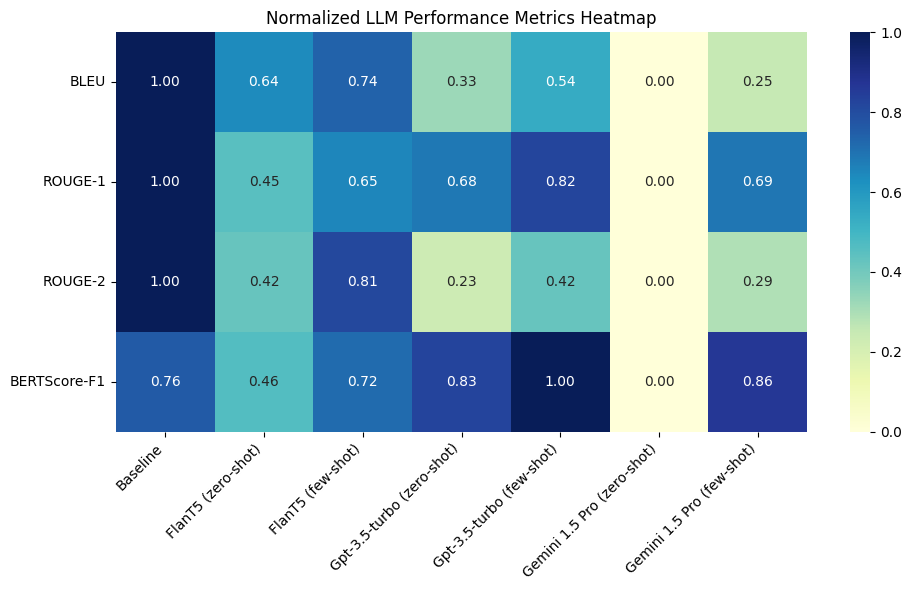

In [ ]:
# Normalizing results for better comparison
df_norm = df_results.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_norm.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Normalized LLM Performance Metrics Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the heatmap:

* BERTScore-F1: The few-shot versions of GPT-3.5-turbo and Gemini 1.5 Pro, as well as the zero-shot GPT-3.5-turbo, have the highest BERTScore-F1 scores, suggesting they generate descriptions that are semantically most similar to the original descriptions.
* ROUGE-1 and ROUGE-2: The Baseline model has the highest ROUGE scores, which is expected as it directly incorporates the bullet points into the description, leading to higher n-gram overlap with the reference. Flan-T5 (few-shot) also shows relatively good ROUGE scores.
* BLEU: The Baseline model also has the highest BLEU score, likely for the same reason as the ROUGE scores.


For further analysis, the BLEU score will no longer be used as it is less ideal for text generation from structured data like this. A high BLEU score can be achieved by simply copying phrases from the input, which may not result in a well-formed description. The Flesch Reading Ease score will also no longer be used as it doesn't directly evaluate the quality of the generated description in terms of its relevance to the product metadata. A description could be easy to read but completely irrelevant.

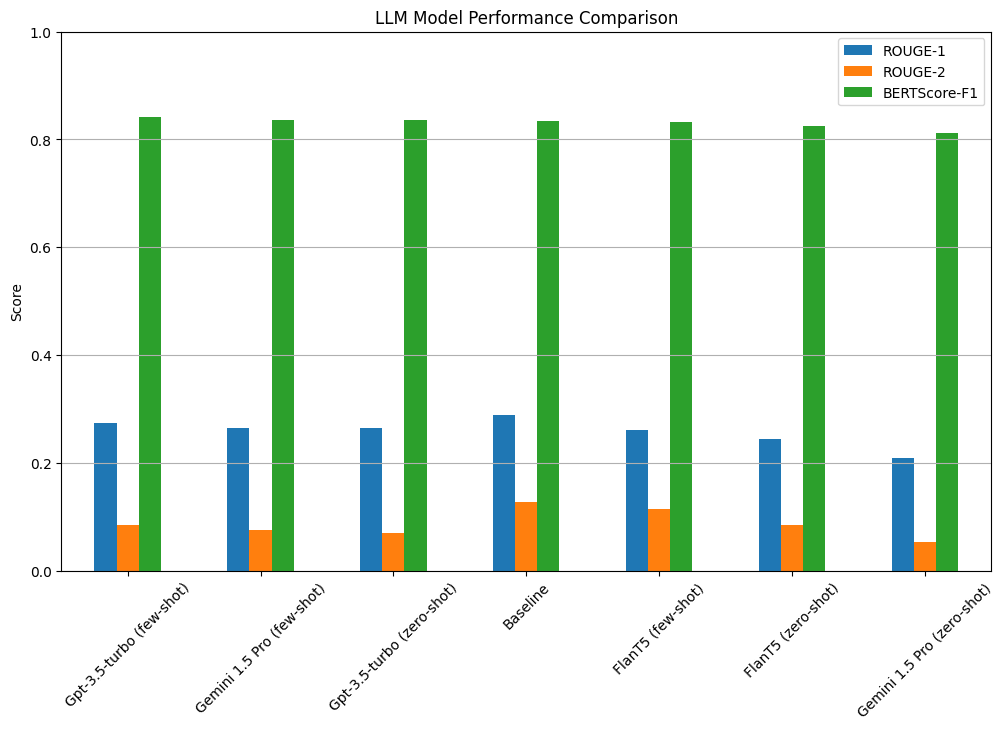

In [ ]:
# bar chart for visual comparison (minus flesch and BLEU score)
import matplotlib.pyplot as plt

metrics = ["ROUGE-1", "ROUGE-2", "BERTScore-F1"]

df_results[metrics].plot(kind='bar', figsize=(12, 7))
plt.title("LLM Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

For the final analysis to see which LLM is the better performing model, the  BERTScore-F1 and ROUGE scores will be used as they are the most informative metrics for evaluating how well the generated text captures the essence and details of the product.  

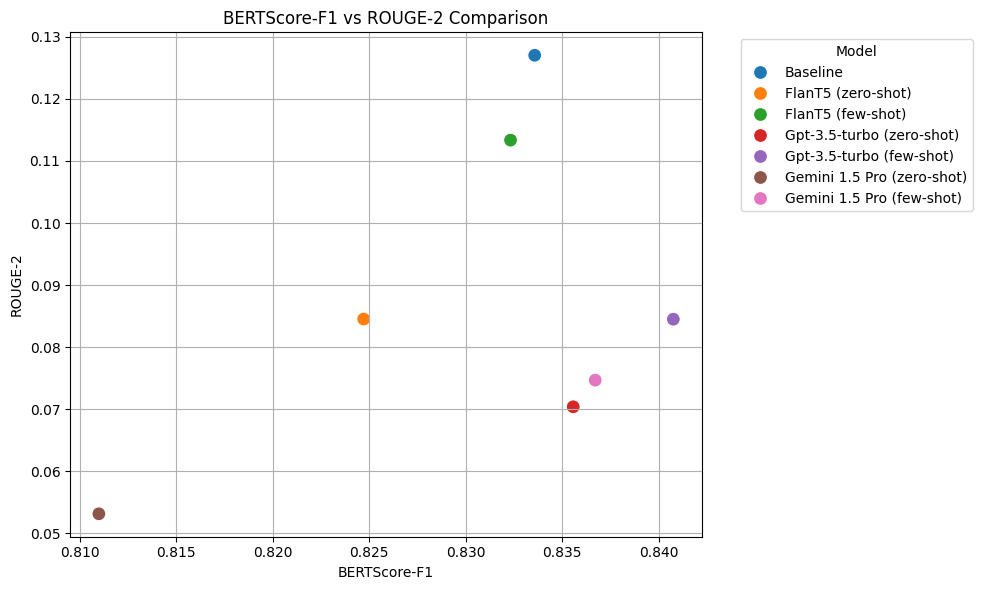

In [ ]:
# Scatter plot of two metrics (BERTScore-F1 and ROUGE-2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_results, x="BERTScore-F1", y="ROUGE-2", hue=df_results.index, s=100)
plt.title("BERTScore-F1 vs ROUGE-2 Comparison")
plt.xlabel("BERTScore-F1")
plt.ylabel("ROUGE-2")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis:

The scatter plot of BERTScore-F1 vs ROUGE-2 shows a trade-off between these two metrics. Models that perform well on BERTScore-F1 don't necessarily have the highest ROUGE scores. The few-shot models for GPT-3.5-turbo and Gemini 1.5 Pro are in the upper right quadrant, indicating a good balance of semantic similarity and n-gram overlap compared to the other models.

The BERTScore-F1 will be used as the main evaluation metric in determining the best description generating LLM since it is the most useful metric in this context. It measures semantic similarity between the generated and reference descriptions, which is crucial for capturing the meaning and relevance of the generated text to the original product information. A higher BERTScore-F1 suggests the generated description is closer to the target description.

/tmp/ipython-input-337624018.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_results.index, y=df_results[metric], palette="coolwarm")


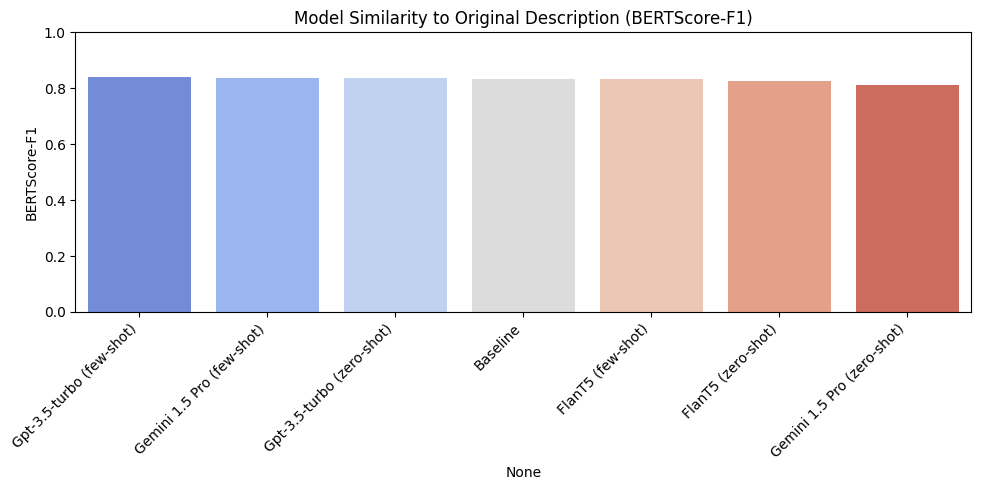

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot BERTScore-F1 similarity:
metric = 'BERTScore-F1'

plt.figure(figsize=(10,5))
sns.barplot(x=df_results.index, y=df_results[metric], palette="coolwarm")
plt.title(f'Model Similarity to Original Description ({metric})')
plt.ylabel(metric)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In summary:
* For generating descriptions the GPT-3.5-Turbo(few shot) model was the best performing in terms of the BERTScore- F1. However other models were very close in score such as the Gemini 1.5 Pro(few shot) model.
* The few-shot prompting technique generally leads to better performance compared to zero-shot for the LLMs in this evaluation.

Potentially improving the modesls by:
* Experimenting with different hyperparameters for each model (learning rate, batch size, number of epochs) to optimize their performance.
* Exploring more sophisticated prompting techniques, such as Chain-of-Thought prompting or incorporating more diverse few-shot examples, to guide the models toward generating better descriptions.
* Using different model architectures that might be better suited for text generation from structured data.
* Combining the predictions of multiple models to potentially leverage their individual strengths and improve overall performance.
* Increasing the size and diversity of the training data since only a small sample was used (25).